<a href="https://colab.research.google.com/github/2023sarveshwattamwar-cell/ML/blob/main/Exp3_ml.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Mean Squared Error: 676972504.8742232
R-squared: -8.331478316048191e-05
Cross-validation MSE scores: [-6.83171422e+08 -6.78292020e+08 -6.66866816e+08 -6.73737401e+08
 -6.77789430e+08]
Average Cross-validation MSE: 675971417.9115345


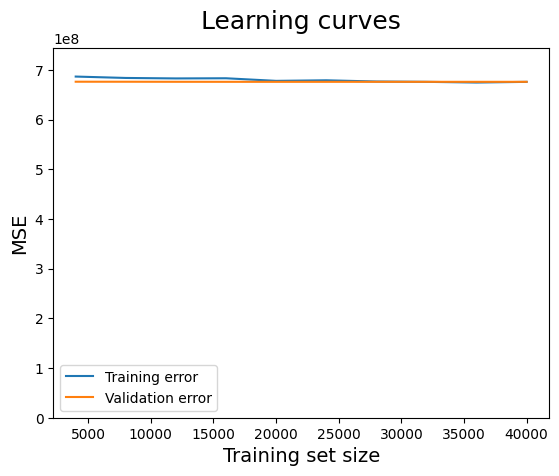

Interpretation of Learning Curve:
- If both training and validation errors are high and close, it indicates high bias (underfitting).
- If training error is low and validation error is high, it indicates high variance (overfitting).
- If both errors are low and close, the model is likely a good fit.


In [6]:
from sklearn.model_selection import train_test_split, cross_val_score, learning_curve
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np
import matplotlib.pyplot as plt

# Assuming 'df' is your DataFrame from the previous step
# Define features (X) and target (y)
# You might need to select appropriate columns and handle categorical features
# For this example, let's assume 'Engine_Size_L' is the feature and 'Price_USD' is the target
X = df[['Engine_Size_L']]  # Using a simple feature for demonstration
y = df['Price_USD']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a simple Linear Regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")

# Cross-validation
cv_scores = cross_val_score(model, X, y, cv=5, scoring='neg_mean_squared_error')
print(f"Cross-validation MSE scores: {cv_scores}")
print(f"Average Cross-validation MSE: {-np.mean(cv_scores)}")

# Bias-Variance Analysis using Learning Curves
train_sizes, train_scores, validation_scores = learning_curve(
    model, X, y, train_sizes=np.linspace(0.1, 1.0, 10), cv=5, scoring='neg_mean_squared_error')

train_mean = -np.mean(train_scores, axis=1)
validation_mean = -np.mean(validation_scores, axis=1)

plt.plot(train_sizes, train_mean, label='Training error')
plt.plot(train_sizes, validation_mean, label='Validation error')
plt.ylabel('MSE', fontsize=14)
plt.xlabel('Training set size', fontsize=14)
plt.title('Learning curves', fontsize=18, y=1.03)
plt.legend()
plt.ylim(0, validation_mean.max() * 1.1)
plt.show()

print("Interpretation of Learning Curve:")
print("- If both training and validation errors are high and close, it indicates high bias (underfitting).")
print("- If training error is low and validation error is high, it indicates high variance (overfitting).")
print("- If both errors are low and close, the model is likely a good fit.")

In [5]:
import glob
import os
import pandas as pd

# If you used kagglehub earlier, you should have `path` variable. Otherwise set manually:
# path = "/content/bmw-sales2010-2024"  # example

csv_files = glob.glob(os.path.join(path, "*.csv"))
if len(csv_files) == 0:
    raise FileNotFoundError(f"No CSV files found in {path}. Place the file there or set path variable.")
csv_file = max(csv_files, key=os.path.getsize)  # heuristic: pick largest CSV
print("Using file:", csv_file)

df = pd.read_csv(csv_file, low_memory=False)
print("Loaded dataframe shape:", df.shape)
display(df.head())

Using file: /root/.cache/kagglehub/datasets/y0ussefkandil/bmw-sales2010-2024/versions/1/BMW sales data (2010-2024).csv
Loaded dataframe shape: (50000, 11)


Model  Year         Region  Color Fuel_Type Transmission  Engine_Size_L  \
0  5 Series  2016           Asia    Red    Petrol       Manual            3.5   
1        i8  2013  North America    Red    Hybrid    Automatic            1.6   
2  5 Series  2022  North America   Blue    Petrol    Automatic            4.5   
3        X3  2024    Middle East   Blue    Petrol    Automatic            1.7   
4  7 Series  2020  South America  Black    Diesel       Manual            2.1   

   Mileage_KM  Price_USD  Sales_Volume Sales_Classification  
0      151748      98740          8300                 High  
1      121671      79219          3428                  Low  
2       10991     113265          6994                  Low  
3       27255      60971          4047                  Low  
4      122131      49898          3080                  Low

from matplotlib import pyplot as plt
_df_0['Year'].plot(kind='hist', bins=20, title='Year')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_1['Engine_Size_L'].plot(kind='hist', bins=20, title='Engine_Size_L')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_2['Mileage_KM'].plot(kind='hist', bins=20, title='Mileage_KM')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_3['Price_USD'].plot(kind='hist', bins=20, title='Price_USD')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
_df_4.groupby('Model').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
_df_5.groupby('Region').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
_df_6.groupby('Color').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
_df_7.groupby('Fuel_Type').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_8.plot(kind='scatter', x='Year', y='Engine_Size_L', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_9.plot(kind='scatter', x='Engine_Size_L', y='Mileage_KM', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_10.plot(kind='scatter', x='Mileage_KM', y='Price_USD', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_11.plot(kind='scatter', x='Price_USD', y='Sales_Volume', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['Year']
  ys = series['Engine_Size_L']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_12.sort_values('Year', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('Model')):
  _plot_series(series, series_name, i)
  fig.legend(title='Model', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('Year')
_ = plt.ylabel('Engine_Size_L')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['Year']
  ys = series['Engine_Size_L']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_13.sort_values('Year', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('Region')):
  _plot_series(series, series_name, i)
  fig.legend(title='Region', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('Year')
_ = plt.ylabel('Engine_Size_L')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['Year']
  ys = series['Engine_Size_L']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_14.sort_values('Year', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('Color')):
  _plot_series(series, series_name, i)
  fig.legend(title='Color', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('Year')
_ = plt.ylabel('Engine_Size_L')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['Year']
  ys = series['Engine_Size_L']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_15.sort_values('Year', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('Fuel_Type')):
  _plot_series(series, series_name, i)
  fig.legend(title='Fuel_Type', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('Year')
_ = plt.ylabel('Engine_Size_L')

from matplotlib import pyplot as plt
_df_16['Year'].plot(kind='line', figsize=(8, 4), title='Year')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_17['Engine_Size_L'].plot(kind='line', figsize=(8, 4), title='Engine_Size_L')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_18['Mileage_KM'].plot(kind='line', figsize=(8, 4), title='Mileage_KM')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_19['Price_USD'].plot(kind='line', figsize=(8, 4), title='Price_USD')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
plt.subplots(figsize=(8, 8))
df_2dhist = pd.DataFrame({
    x_label: grp['Region'].value_counts()
    for x_label, grp in _df_20.groupby('Model')
})
sns.heatmap(df_2dhist, cmap='viridis')
plt.xlabel('Model')
_ = plt.ylabel('Region')

from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
plt.subplots(figsize=(8, 8))
df_2dhist = pd.DataFrame({
    x_label: grp['Color'].value_counts()
    for x_label, grp in _df_21.groupby('Region')
})
sns.heatmap(df_2dhist, cmap='viridis')
plt.xlabel('Region')
_ = plt.ylabel('Color')

from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
plt.subplots(figsize=(8, 8))
df_2dhist = pd.DataFrame({
    x_label: grp['Fuel_Type'].value_counts()
    for x_label, grp in _df_22.groupby('Color')
})
sns.heatmap(df_2dhist, cmap='viridis')
plt.xlabel('Color')
_ = plt.ylabel('Fuel_Type')

from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
plt.subplots(figsize=(8, 8))
df_2dhist = pd.DataFrame({
    x_label: grp['Transmission'].value_counts()
    for x_label, grp in _df_23.groupby('Fuel_Type')
})
sns.heatmap(df_2dhist, cmap='viridis')
plt.xlabel('Fuel_Type')
_ = plt.ylabel('Transmission')

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_24['Model'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_24, x='Year', y='Model', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_25['Region'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_25, x='Year', y='Region', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_26['Color'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_26, x='Year', y='Color', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_27['Fuel_Type'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_27, x='Year', y='Fuel_Type', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)